# Convolutional Neural Networks

# Importar Librerías

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU

# Cargar set de Imágenes

In [27]:
dirname = os.path.join(os.getcwd(), '..\\..\\asl_alphabet_train\\asl_alphabet_train')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

print(directories)

leyendo imagenes de  C:\Users\52216137\Documents\Abraham\tec-emergentes-proyecto\sign-language-translator\model 1\..\..\asl_alphabet_train\asl_alphabet_train\
C:\Users\52216137\Documents\Abraham\tec-emergentes-proyecto\sign-language-translator\model 1\..\..\asl_alphabet_train\asl_alphabet_train\A 1
C:\Users\52216137\Documents\Abraham\tec-emergentes-proyecto\sign-language-translator\model 1\..\..\asl_alphabet_train\asl_alphabet_train\B 3000
C:\Users\52216137\Documents\Abraham\tec-emergentes-proyecto\sign-language-translator\model 1\..\..\asl_alphabet_train\asl_alphabet_train\C 3000
C:\Users\52216137\Documents\Abraham\tec-emergentes-proyecto\sign-language-translator\model 1\..\..\asl_alphabet_train\asl_alphabet_train\D 3000
C:\Users\52216137\Documents\Abraham\tec-emergentes-proyecto\sign-language-translator\model 1\..\..\asl_alphabet_train\asl_alphabet_train\del 3000
C:\Users\52216137\Documents\Abraham\tec-emergentes-proyecto\sign-language-translator\model 1\..\..\asl_alphabet_train\asl_

# Creamos las etiquetas

In [28]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  87000


In [29]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 A
1 B
2 C
3 D
4 del
5 E
6 F
7 G
8 H
9 I
10 J
11 K
12 L
13 M
14 N
15 nothing
16 O
17 P
18 Q
19 R
20 S
21 space
22 T
23 U
24 V
25 W
26 X
27 Y
28 Z


In [30]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  29
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]


# Creamos Sets de Entrenamiento y Test

In [31]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (69600, 200, 200, 3) (69600,)
Testing data shape :  (17400, 200, 200, 3) (17400,)


Text(0.5,1,'Ground Truth : 28')

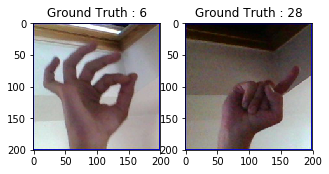

In [32]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

In [34]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

MemoryError: 

## Hacemos el One-hot Encoding para la red

In [15]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 1
After conversion to one-hot: [0. 1. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [16]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [17]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(96, 200, 200, 3) (24, 200, 200, 3) (96, 5) (24, 5)


# Creamos el modelo de CNN

In [18]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 6 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [19]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

In [20]:
sport_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 21, 28, 32)        896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 21, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4928)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                157728    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32)                0         
__________

In [21]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [22]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
# como ejemplo, en mi Macbook pro tarda 4 minutos
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

ValueError: Error when checking input: expected conv2d_input to have shape (21, 28, 3) but got array with shape (200, 200, 3)

In [18]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("sports_mnist.h5py")

# Evaluamos la red

In [19]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

15426/15426 [==============================] - 3s 213us/step


In [20]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.7142139548776556
Test accuracy: 0.8353429275249579


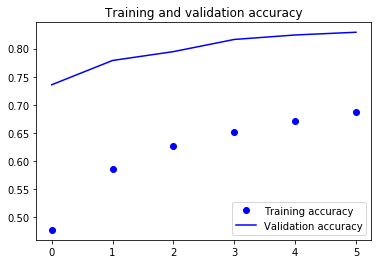

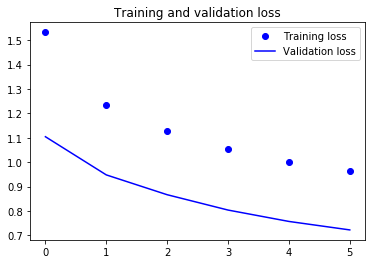

In [21]:
accuracy = sport_train.history['acc']
val_accuracy = sport_train.history['val_acc']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
predicted_classes2 = sport_model.predict(test_X)

In [23]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [24]:
predicted_classes.shape, test_Y.shape

((15426,), (15426,))

# Aprendamos de los errores: Qué mejorar

Found 12886 correct labels


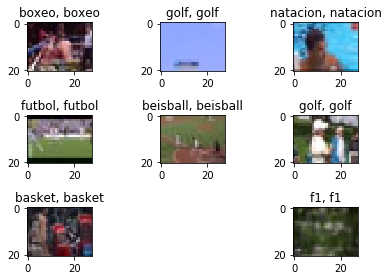

In [25]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 2540 incorrect labels


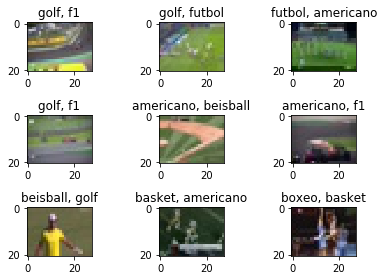

In [26]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [27]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.70      0.57      0.63      1861
    Class 1       0.81      0.89      0.85      1765
    Class 2       0.81      0.76      0.78      1572
    Class 3       0.85      0.91      0.88      1417
    Class 4       0.96      1.00      0.98      1487
    Class 5       0.81      0.53      0.64      1020
    Class 6       0.94      0.82      0.88      1537
    Class 7       0.68      0.89      0.77      1970
    Class 8       0.92      0.93      0.92      1013
    Class 9       0.98      1.00      0.99      1784

avg / total       0.84      0.84      0.83     15426



# Prediccion de una nueva imagen

In [33]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['sportimages/golf/golf_0112.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (21, 28),clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = sport_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])

sportimages/golf/golf_0112.jpg golf


C:\Users\52216137\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
